In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt

from wave_optics import backend as bd
from wave_optics import AngularSpecgtrumMethod, select_backend

lib = 'numpy'

device = torch.device('cuda') if lib == 'torch' else None

select_backend(lib)

nx, ny = 512, 512
dx, dy = 0.3, 0.3

# Lens
f = 300.
R = 50.
lamb0 = 0.532

if lib == 'torch':
    xa = (bd.arange(0,nx,1).to(device)-(nx-1)/2)*dx
    ya = (bd.arange(0,ny,1).to(device)-(ny-1)/2)*dy
else:
    xa = (bd.arange(0,nx,1)-(nx-1)/2)*dx
    ya = (bd.arange(0,ny,1)-(ny-1)/2)*dy

x, y = bd.meshgrid(xa,ya,indexing='ij')

phase = bd.exp(1.j* (-2*bd.pi/lamb0 * (bd.sqrt(x**2+y**2+f**2) - f)))
phase[x**2+y**2>R**2] = 0

ASM = AngularSpecgtrumMethod([nx,ny],[dx,dy],[f],[lamb0],sign=1,device=device)


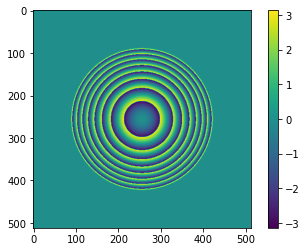

In [2]:
plt.imshow(np.angle(phase))
plt.colorbar()

In [3]:
plane = ASM.propagate(phase)

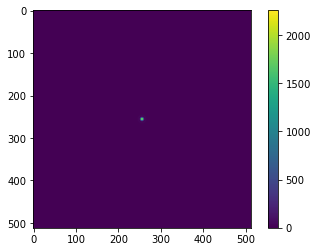

In [4]:
plt.imshow(np.abs(plane[0,0,0,:,:])**2)
plt.colorbar()